# Assignment 2

## About

This week we will be programming.

<font color='red'>Before you start, make sure to install the following packages:

- qiskit
- qiskit[visualization]
- qiskit-aer

</font>

You *can* use the boilerplate, but you certainly don't need to.

## Tips

- Implement circuits using Qiskit
- Feel free to use your favourite library for the calculations
- If you choose to use Numpy:
    - You can represent vectors and matrices using *numpy.array(...)*
    - Caclulate matrix multiplication with *@* or *numpy.matmul(...)*
    - Calculate Tensor product with *numpy.kron(...)* 
    - Create identity matrix of dimension *d* with *numpy.eye(d)*
    - To get the complex conjugate transpose of a matrix you can use *.conj().T*
- If you like latex you can pretty-print your results using *array_to_latex(...)*
- <font color='red'>Be aware of Qiskit's ordering of qubits:</font> https://qiskit.org/documentation/explanation/endianness.html

## Imports

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import array_to_latex
import numpy as np

## Excercises

### 1

Create variables *ket0* and *ket1* representing $|0\rangle $ and $ |1\rangle $ (Z-basis states)

(Pretty) print *ket1* and make sure it has the correct dimensions

In [2]:
ket0 = np.array([[1,0]]).T
ket1 = np.array([[0,1]]).T

array_to_latex(ket1)

<IPython.core.display.Latex object>

### 2

Construct a matrix *X* that corresponds to the X-gate. Use the Dirac notation of X-gate, as described in the lecture notes, to construct *X* from *ket0* and *ket1*

(Pretty) print *X* and make sure it has the correct dimensions and values

In [3]:
X = ket0 @ ket1.conj().T + ket1 @ ket0.conj().T

#Test
array_to_latex(X)

<IPython.core.display.Latex object>

### 3

Function *create_CU_gate(U)* takes a unary gate *U* as input. Implement the function so that it returns the controlled version of *U*

Create & print a *CX*-gate

In [4]:
def create_CU_gate(U):
    I = np.array([[1,0],[0,1]])
    cu = np.kron(ket0 @ ket0.conj().T, I) + np.kron(ket1 @ ket1.conj().T, U)
    return cu

CX = create_CU_gate(X)

#Test
array_to_latex(CX)

<IPython.core.display.Latex object>

### 4

Function *create_swap_gate()* takes no input. Implement the function so that it returns a binary *swap* gate

In [5]:
def create_swap_gate():
    sg = (np.kron(ket0,ket0) @ np.kron(ket0,ket0).T + 
        np.kron(ket1,ket1) @ np.kron(ket1,ket1).T +
        np.kron(ket0,ket1) @ np.kron(ket1,ket0).T +
        np.kron(ket1,ket0) @ np.kron(ket0,ket1).T)
    return sg

#Test
array_to_latex(create_swap_gate())

<IPython.core.display.Latex object>

### 5

Function *reverse_CU_gate(U)* takes a binary CU-gate *CU* as input. Implement the function so that it returns the reverse of *CU*

(Following Philip's notation from the lecture notes) Create & print the *XƆ* gate

In [6]:
def reverse_CU_gate(CU):
   return create_swap_gate() @ (CU @ create_swap_gate())

XƆ = reverse_CU_gate(CX)

#Test
array_to_latex(XƆ)

<IPython.core.display.Latex object>

### 6

Function *CXSwap()* takes no input. Can you implement the function so that it constructs the binary *swap* gate by using a combination of controlled NOT-gates?

In [7]:
def CXSwap():
    return CX @ reverse_CU_gate(CX) @ CX

#Test
array_to_latex(CXSwap())

<IPython.core.display.Latex object>

### 7

Create a backend with *QasmSimulator()*

Using Qiskit's *QuantumCircuit*: 
- Create a circuit with two qubits.
- Apply a X-gate to the first qubit
- Display the circuit using *draw(...)*

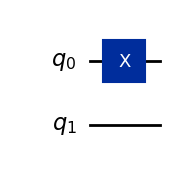

In [8]:
#Get backend
backend = QasmSimulator()

#Create a QuantumCircuit with 2 qubits
qc = QuantumCircuit(2)

#Apply x gate to first qubit
qc.x(0)

#Display circuit
qc.draw("mpl")

### 8

Create a function *get_state_vector(qc)* that takes a *QuantumCircuit* as input and:

- Saves statevector
- Executes circuit and retrieves result
- returns the statevector. 

Run *get_state_vector* with the circuit from task 7 as a parameter. (pretty)print results. Did you get what you expected?

In [9]:
from qiskit.quantum_info import Statevector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def get_state_vector(qc: QuantumCircuit):

    #Save the state vector
    sv = Statevector(qc)
    
    #Execute & get result
    pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
    pm.run(qc)
    
    #Return state vector
    return sv

sv = get_state_vector(qc)
array_to_latex(sv)

<IPython.core.display.Latex object>

### 9

Implement the Bell states. Use *get_state_vector(...)* to verify your results.

#### $|Φ^+⟩$

In [10]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

array_to_latex(get_state_vector(qc))

<IPython.core.display.Latex object>

#### $|Φ^-⟩$

In [11]:
qc = QuantumCircuit(2)

qc.h(0)
qc.z(0)
qc.cx(0,1)

array_to_latex(get_state_vector(qc))

<IPython.core.display.Latex object>

#### $|Ψ^+⟩$

In [12]:
qc = QuantumCircuit(2)

qc.x(1)
qc.h(0)
qc.cx(0,1)

array_to_latex(get_state_vector(qc))

<IPython.core.display.Latex object>

#### $|Ψ^-⟩$

In [13]:
qc = QuantumCircuit(2)

qc.x(1)
qc.h(0)
qc.z(0)
qc.z(1)
qc.cx(0,1)

array_to_latex(get_state_vector(qc))

<IPython.core.display.Latex object>